In [1]:
print("Check if LightPipes has been installed. If not, install it!")
!pip install lightpipes

Check if LightPipes has been installed. If not, install it!


In [2]:
from IPython.display import HTML
HTML('''
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

In [3]:
import ipywidgets as widgets
from IPython.display import Javascript, display
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
button = widgets.Button(description="Start simulation")
button.style.button_color = 'lightgreen'
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Start simulation', style=ButtonStyle(button_color='lightgreen'))

Button(description='Start simulation', style=ButtonStyle(button_color='lightgreen'))

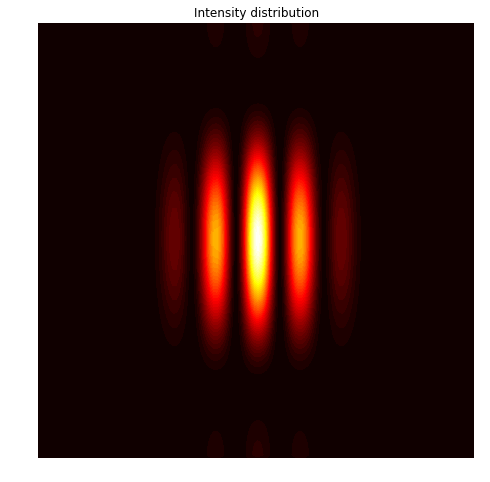

In [5]:
%matplotlib inline
#!/usr/bin/env python
"""
    Computer practical 3. Two holes interferometer, Young's experiment.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates a two holes interferometer (Young's experiment)
    Measure the positions of minima and/or maxima. Study the effect of
    placing a thin glass in front of one of the holes.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
    :license: MIT, see License for more details.
    
"""
import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import sys
import webbrowser
if sys.version_info[0] < 3:
    from Tkinter import *
    import Tkinter as Tk
    import tkMessageBox
else:
    from tkinter import *
    import tkinter as Tk
    from tkinter import messagebox
from LightPipes import *
import math

root = Tk.Tk()
root.wm_title("Computer practical: 3. Two holes interferometer.        LP-version = " + LPversion)
root.wm_protocol("WM_DELETE_WINDOW", root.quit)

wavelength=530*nm;
size=10*mm;
N=150; N2=int(N/2)

z=90*cm
d=0.5*mm
R=0.02*mm
phi = 0.0
D=DoubleVar()
Dhole=DoubleVar()
Z=DoubleVar()
PHI=DoubleVar()
D.set(d/mm)
Dhole.set(2*R/mm)
Z.set(z/cm)
PHI.set(phi)

fig=plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

canvas = FigureCanvasTkAgg(fig, master=root)
canvas._tkcanvas.pack(side=Tk.LEFT, fill=Tk.BOTH, expand=1)
v=StringVar()

#set the correct backend
if sys.platform == 'darwin':
    %matplotlib osx

def TheExample(event):
    global I
    R=Dhole.get()*mm
    d=D.get()*mm
    z=Z.get()*cm
    phi=PHI.get()
    F=Begin(size,wavelength,N);
    F1=CircAperture(R,-d/2,0,F);
    Phi = Phase(F);
    for i in range (1,N):
        for j in range(1,N):
            Phi[i][j] = phi;
    F1 = SubPhase(Phi, F1);
    F2=CircAperture(R,d/2,0,F);
    F=BeamMix(F1,F2);
    F=Fresnel(z,F);
    I=Intensity(1,F);
    ax1.clear()
    ax1.contourf(I,50,cmap='hot');
    ax1.axis('off'); ax1.axis('equal');
    str='Intensity distribution'
    ax1.set_title(str)
    canvas.draw()

def motion(event):
    x=event.xdata;y=event.ydata
    if (x and y is not None and x>0 and x<N and y>0 and y<N):
        v.set('x=%3.2f mm, y=%3.2f mm\n I=%3.3f [a.u.]' %((-size/2+x*size/N)/mm,(-size/2+y*size/N)/mm,I[int(x)][int(y)]))
        root.configure(cursor='crosshair')
    else:
        v.set('')
        root.configure(cursor='arrow')
        

def _quit():
    root.quit()

Scale(  root,
        takefocus = 1,
        orient='horizontal',
        label = 'diameter holes [mm]',
        length = 200, from_=0.05, to=0.5,
        resolution = 0.001,
        variable = Dhole,
        cursor="hand2",
        command = TheExample).pack()
        
Scale(  root,
        takefocus = 1,
        orient='horizontal',
        label = 'distance between holes [mm]',
        length = 200, from_=0.05, to=1.5,
        resolution = 0.001,
        variable = D,
        cursor="hand2",
        command = TheExample).pack()
        
Scale(  root,
        takefocus = 1,
        orient='horizontal',
        label = 'z [cm]',
        length = 200,
        from_=0.01, to=200.0,
        resolution = 0.01,
        variable = Z,
        cursor="hand2",
        command = TheExample).pack()
        
def cb():
    TheExample(0)
    
def openbrowser(event):
    webbrowser.open_new(r"https://opticspy.github.io/lightpipes/TwoHoles.html")
    
Checkbutton(root,
            text="Place glass before one of the holes",
            onvalue=0.8,
            offvalue=0.0,
            variable=PHI,
            cursor="hand2",
            command = cb).pack()

Button( root,
        width = 24,
        text='Quit',
        cursor="hand2",
        command=_quit).pack(pady=10)
        
link = Label(root, text="help", fg="blue", cursor="hand2")
link.pack()
link.bind("<Button-1>", openbrowser)

Label(root, textvariable=v).pack(pady=50)

cid = fig.canvas.mpl_connect('motion_notify_event', motion)

TheExample(0)
root.mainloop()
root.destroy()
